### 1. Membaca dataset (load dataset)

In [223]:
from sklearn import datasets
import pandas as pd

bc = datasets.load_breast_cancer()
df_bc = pd.DataFrame(bc.data, columns = bc.feature_names)
df_bc["target"] = bc.target

x_bc = df_bc.iloc[:, :-1]
y_bc = df_bc["target"]

In [224]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [225]:
from sklearn.model_selection import train_test_split

x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(
    x_bc, 
    y_bc, 
    test_size = 0.2, 
    random_state = 568
)

### 2. Melakukan Pembelajaran
### 3. Simpan Model Hasil Pembelajaran
### 4. Proses Preditiction

In [226]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_fit_model(model, x_train, y_train):
    return model.fit(x_train, y_train)

def get_y_pred(fit_model, x_test):
    y_pred = fit_model.predict(x_test)
    return y_pred

def get_all_metrics_score(y_test, y_pred):
    return [
        accuracy_score(y_test, y_pred), 
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]

def get_confusion_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

In [227]:
import pickle
def save_model(model, dest_path):
    # pkl extension
    pickle.dump(model, open(dest_path, 'wb'))
    
def load_model(src_path):
    # pkl extension
    return pickle.load(open(src_path, 'rb'))

#### A. DecisionTreeClassifier

In [228]:
# DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text

dt = tree.DecisionTreeClassifier(criterion = "entropy", max_features = "sqrt", random_state = 40)
dt_fit = get_fit_model(dt, x_train_bc, y_train_bc)
save_model(dt_fit, "./model/dt_fit.pkl")

In [229]:
dt_fit = load_model("./model/dt_fit.pkl")
y_pred = get_y_pred(dt_fit, x_test_bc)
y_pred = dt_fit.predict(x_test_bc)

dt_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
dt_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{dt_bc_scores}\n")
print(f"{dt_bc_confusion_mat}\n")
print(export_text(dt))

[0.9122807017543859, 0.9104477611940298, 0.9384615384615385, 0.9242424242424243]

[[43  6]
 [ 4 61]]

|--- feature_13 <= 30.83
|   |--- feature_21 <= 25.83
|   |   |--- feature_23 <= 989.45
|   |   |   |--- feature_25 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_25 >  0.50
|   |   |   |   |--- feature_20 <= 15.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_20 >  15.45
|   |   |   |   |   |--- class: 0
|   |   |--- feature_23 >  989.45
|   |   |   |--- class: 0
|   |--- feature_21 >  25.83
|   |   |--- feature_25 <= 0.35
|   |   |   |--- feature_7 <= 0.05
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_22 <= 113.95
|   |   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |   |--- feature_23 <= 643.25
|   |   |   |   |   |   |   |   |--- class: 1
| 

#### B. Id3Estimator

In [230]:
# Id3Estimator
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from id3 import Id3Estimator

id3_estimator = Id3Estimator(prune = True, gain_ratio = True)
id3_estimator_fit = get_fit_model(id3_estimator, x_train_bc, y_train_bc)
save_model(id3_estimator_fit, "./model/id3_estimator_fit.pkl")

In [231]:
id3_estimator_fit = load_model("./model/id3_estimator_fit.pkl")
y_pred = get_y_pred(id3_estimator_fit, x_test_bc)

id3_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
id3_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{id3_bc_scores}\n")
print(f"{id3_bc_confusion_mat}\n")

[0.9385964912280702, 0.9264705882352942, 0.9692307692307692, 0.9473684210526316]

[[44  5]
 [ 2 63]]



#### C. K Means

In [232]:
# K Means
from sklearn.cluster import KMeans

k_means = KMeans(n_init = "auto", n_clusters = 2, max_iter = 5000, random_state = 15)
k_means_fit = get_fit_model(k_means, x_train_bc, y_train_bc)
save_model(k_means_fit, "./model/k_means_fit.pkl")

In [233]:
k_means_fit = load_model("./model/k_means_fit.pkl")
y_pred = get_y_pred(k_means_fit, x_test_bc)

k_means_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
k_means_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{k_means_bc_scores}\n")
print(f"{k_means_bc_confusion_mat}\n")

[0.8421052631578947, 0.7831325301204819, 1.0, 0.8783783783783784]

[[31 18]
 [ 0 65]]



#### D. LogisticRegression

In [234]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 5000)
log_reg_fit = get_fit_model(log_reg, x_train_bc, y_train_bc)
save_model(log_reg_fit, "./model/log_reg_fit.pkl")

In [235]:
log_reg_fit = load_model("./model/log_reg_fit.pkl")
y_pred = get_y_pred(log_reg_fit, x_test_bc)

log_reg_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
log_reg_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{log_reg_bc_scores}\n")
print(f"{log_reg_bc_confusion_mat}\n")

[0.9736842105263158, 0.9696969696969697, 0.9846153846153847, 0.9770992366412214]

[[47  2]
 [ 1 64]]



#### E. Neural_network

In [245]:
# Neural_network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 5000, solver = "lbfgs")
mlp_fit = get_fit_model(mlp, x_train_bc, y_train_bc)
save_model(mlp_fit, "./model/mlp_fit.pkl")

In [237]:
mlp_fit = load_model("./model/mlp_fit.pkl")
y_pred = get_y_pred(mlp_fit, x_test_bc)

mlp_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
mlp_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{mlp_bc_scores}\n")
print(f"{mlp_bc_confusion_mat}\n")

[0.5701754385964912, 0.5701754385964912, 1.0, 0.7262569832402235]

[[ 0 49]
 [ 0 65]]



#### F. SVM

In [238]:
# SVM

from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc_fit = get_fit_model(svc, x_train_bc, y_train_bc)
save_model(svc_fit, "./model/svc_fit.pkl")

In [239]:
svc_fit = load_model("./model/svc_fit.pkl")
y_pred = get_y_pred(svc_fit, x_test_bc)

svc_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
svc_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{svc_bc_scores}\n")
print(f"{svc_bc_confusion_mat}\n")

[0.9649122807017544, 0.9552238805970149, 0.9846153846153847, 0.9696969696969696]

[[46  3]
 [ 1 64]]



#### Metrix Evaluasi

In [240]:
index = [
    "DecisionTree",
    "ID3",
    "K Means",
    "LogisticRegression",
    "Neural_network",
    "SVM"
]
columns = [
    "Accuracy", 
    "Precision", 
    "Recall", 
    "F1"
]

bc_algos_scores = [
    dt_bc_scores,
    id3_bc_scores,
    k_means_bc_scores,
    log_reg_bc_scores,
    mlp_bc_scores,
    svc_bc_scores
]

bc_algos_metrics_score = pd.DataFrame(
    data = bc_algos_scores, 
    index = index, 
    columns = [["Breast Cancer" for i in range(len(columns))], columns])

In [241]:
bc_algos_metrics_score

Breast Cancer                              
                        Accuracy Precision    Recall        F1
DecisionTree            0.912281  0.910448  0.938462  0.924242
ID3                     0.938596  0.926471  0.969231  0.947368
K Means                 0.842105  0.783133  1.000000  0.878378
LogisticRegression      0.973684  0.969697  0.984615  0.977099
Neural_network          0.570175  0.570175  1.000000  0.726257
SVM                     0.964912  0.955224  0.984615  0.969697

### 5. Analisis hasil metrik evaluasi

In [242]:
bc_algos_metrics_score

Breast Cancer                              
                        Accuracy Precision    Recall        F1
DecisionTree            0.912281  0.910448  0.938462  0.924242
ID3                     0.938596  0.926471  0.969231  0.947368
K Means                 0.842105  0.783133  1.000000  0.878378
LogisticRegression      0.973684  0.969697  0.984615  0.977099
Neural_network          0.570175  0.570175  1.000000  0.726257
SVM                     0.964912  0.955224  0.984615  0.969697

<AxesSubplot: >

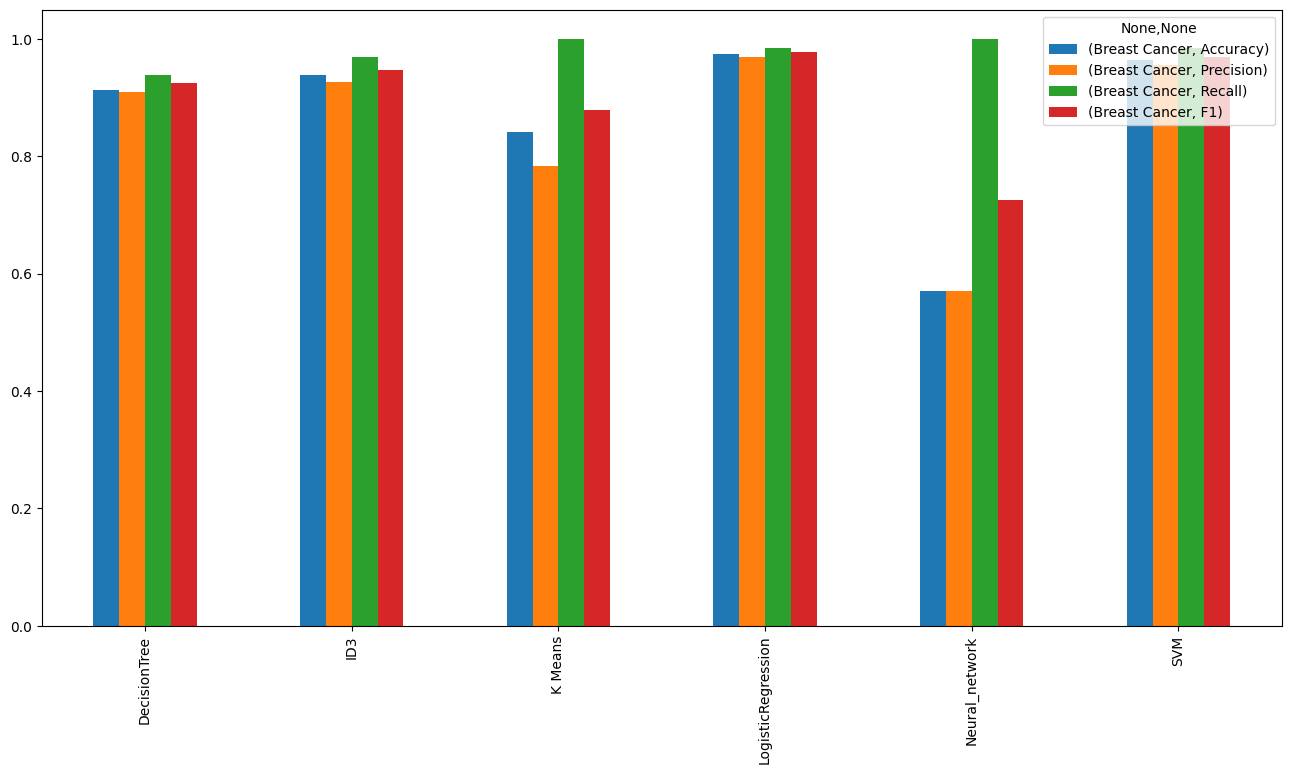

In [243]:
import matplotlib.pyplot as plt

bc_algos_metrics_score.plot.bar(stacked=False, figsize=(16,8))

Pada gragik di atas, kita dapat melihat bahwa metrix evaluasi yang dihasilkan masing-masing algoritma relatif mirip dengan yang lainnya. Dengan nilai metrix evaluasi tertinggi rata-rata ada di logistic regression, yaitu dengan nilai akurasi 0.973684, presisi 0.969697, recall 0.984615, dan F1 0.977099. Dataset yang digunakan untuk training sekitar 455 dari 569 instance yang ada sehingga masing-masing algoritma mendapatkan data yang cukup untuk melakukan training modelnya. Oleh sebab itu, hasil metrix evaluasi yang dihasilkan relatif mirip antara satu algoritma dengan algoritma lainnya.

Selain itu, algoritma K-Means rata-rata menghasilkan nilai metrix evaluasi yang lebih rendah dari algoritma lainnya, yaitu dengan nilai akurasi 0.842105, presisi 0.783133, recall 1.000000, dan F1 0.878378. Hal ini bisa terjadi karena sebenarnya algoritma K-Means ini adalah algoritma untuk tujuan clustering sehingga setiap data dikelompokkan berdasarkan kemiripannya bukan pengaruhnya terhadap label targetnya.

Berikut adalah keseluruhan hasil untuk setiap algoritma:

1. Decision tree classifier: akurasi 0.912281, presisi 0.910448, recall 0.938462, dan F1 0.924242.
2. ID3 Estimator: akurasi 0.859649, presisi 0.855072, recall 0.907692, dan F1 0.880597.
3. K-Means: akurasi 0.842105, presisi 0.783133, recall 1.000000, dan F1 0.878378.
4. Logistic regression: akurasi 0.973684, presisi 0.969697, recall 0.984615, dan F1 0.977099.
5. Neural Network: akurasi 0.973684, presisi 0.969697, recall 0.984615, dan F1 0.977099.
6. SVM: Dari hasil evaluasi, didapatkan bahwa SVM menghasilkan model dengan akurasi sebesar 98% dengan F1 scorenya 99%.

### 6. K-fold cross validation  

In [244]:
from sklearn.model_selection import cross_validate
from numpy import mean

#use k-fold CV to evaluate model
cv_result = cross_validate(dt, x_bc, y_bc, scoring=("accuracy", "f1"), cv=10, n_jobs=-1)
print("accuracy :", sum(cv_result['test_accuracy'])/len(cv_result['test_accuracy']))
print("F1 score :",sum(cv_result['test_f1'])/len(cv_result['test_f1']))

accuracy : 0.9157581453634085
F1 score : 0.9328963186240007


Dari hasil cross validation di atas diperoleh rata-rata akurasi dari model decission tree adalah 0.9157581453634085 dan rata-rata F1 score-nya adalah 0.9328963186240007. Nilai ini lebih tinggi dibandingkan dengan nilai akurasi dan F1 score pada soal nomor 4, akurasi: 0.912281 dan F1 score: 0.924242. Hal tersebut karena metode K-Fold cross validation akan membagi data sebanyak K bagian (fold). Misalkan, pada contoh di atas kita telah membagi data menjadi 10 bagian yaitu K=10. Kemudian 10 set data tersebut digunakan untuk melakukan training dan testing model. Jadi model akan di-train dan di-test 10 kali, tetapi untuk setiap iterasi kita akan menggunakan satu bagian sebagai data testing dan sisanya sebagai data training. Perhatikan bahwa untuk setiap iterasi, data training dan testing yang digunakan berubah-ubah sehingga menambah keefektifan metode ini. Oleh karena itu, metode secara signifikan mengurangi underfitting karena kita menggunakan sebagian besar data untuk pelatihan (fitting), dan juga secara signifikan mengurangi overfitting karena sebagian besar data juga digunakan dalam set validasi.